In [1]:
from hnn_core import simulate_dipole, calcium_model, MPIBackend
from hnn_core.viz import plot_dipole
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import add_supra_beta_drives, rescale_pyr_morph
sns.set()

In [2]:
%%capture
scaling_factors = [1, .8, .5]
props = ['L', 'diam', 'Ra', 'cm']
pyr_cells = ['L2_pyramidal', 'L5_pyramidal']

net_list = list()
dpl_list = list()
for scaling_factor in scaling_factors:
    net = calcium_model()
    add_supra_beta_drives(net, beta_start=200, strength=1)
    for prop in props:        
        if prop == 'cm':
            rescale_pyr_morph(net=net, cell_types=pyr_cells, compartment_prop=prop, scaling_factor=1/scaling_factor)
        else:
            rescale_pyr_morph(net=net, cell_types=pyr_cells, compartment_prop=prop, scaling_factor=scaling_factor)
    with MPIBackend(n_procs=6):
        dpl = simulate_dipole(net, tstop=500)[0]

    net_list.append(net.copy())
    dpl_list.append(dpl.copy())


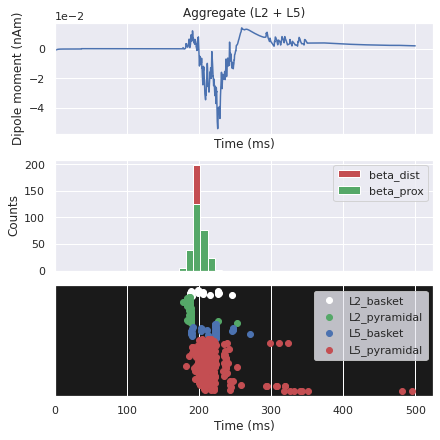

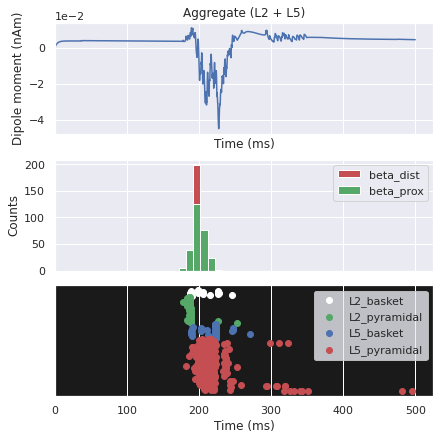

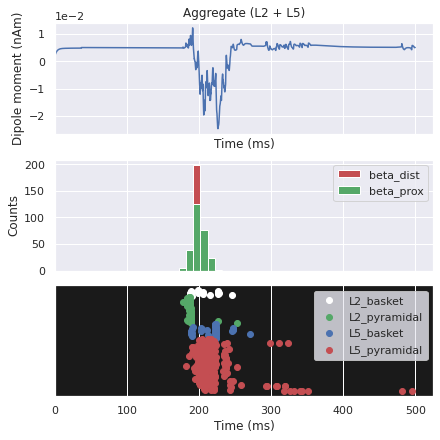

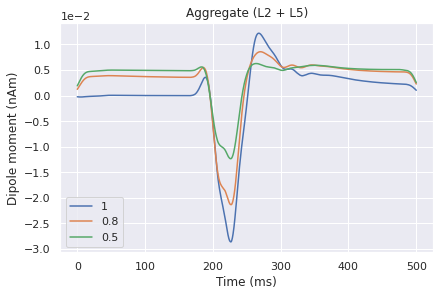

In [3]:
for idx, dpl in enumerate(dpl_list):

    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(6, 6), constrained_layout=True)
    plot_dipole(dpl, ax=axes[0], layer='agg', show=False)
    net.cell_response.plot_spikes_hist(ax=axes[1], show=False)
    net.cell_response.plot_spikes_raster(ax=axes[2], show=False)
    
    fig.savefig(f'ca_model_beta_{scaling_factors[idx]}.png')

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 4), constrained_layout=True)
plot_dipole([dpl.copy().smooth(30) for dpl in dpl_list], ax=axes, show=False)
axes.legend(scaling_factors)
fig.savefig(f'ca_model_beta_comparison.png')

In [11]:
cell_name = 'L5_pyramidal'
overide_params = {
    'L5Pyr_soma_gkbar_hh2': 0.06,
    'L5Pyr_soma_gnabar_hh2': 0.32
}
pos = net_orig.cell_types[cell_name].pos
net_orig.cell_types[cell_name] = pyramidal_ca(
    cell_name=_short_name(cell_name), pos=pos)

[1, 0.8, 0.5]